# Multiple_Linear_Regression_Bike_Sharing_Assignment

    Submitted by Abhishek_Tomar

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 


**Business Goal:**
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

## Step1: Importing Libraries

In [1]:
#imporitng the required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

# Step2: Reading Dataset and Understanding Data

### Data Dictionary
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy **: good**
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist **: moderate**
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds **: bad**
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog **: severe**
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [5]:
#Read the csv file using pandas
bikeSharing_df = pd.read_csv('day.csv')

In [6]:
#Inspect first few rows
bikeSharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [7]:
#check the shape
bikeSharing_df.shape

(730, 16)

In [8]:
#check dataframe for null and datatype 
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [9]:
#check the details of numerical data
bikeSharing_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean   365.500000    2.498630    0.500000    6.526027    0.028767    2.997260   
std    210.877136    1.110184    0.500343    3.450215    0.167266    2.006161   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.250000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    365.500000    3.000000    0.500000    7.000000    0.000000    3.000000   
75%    547.750000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    730.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.683562    1.394521   20.319259   23.726322   62.765175   12.763620   
std      0.465405    0.544807    7.506729    8.150308   14.237589    5.195841   
min      0.000000    1.000000    2.424346    3.953480    0.000000    1.500244   
25%      0.000000    1.000000   13.811885   16.889713   52.000000    9.041650   
50%      1.000000    1.000000   20.465826   24.368225   62.625000   12.125325   
75%      1.000000    2.000000   26.880615   30.445775   72.989575   15.625589   
max      1.000000    3.000000   35.328347   42.044800   97.250000   34.000021   

            casual   registered          cnt  
count   730.000000   730.000000   730.000000  
mean    849.249315  3658.757534  4508.006849  
std     686.479875  1559.758728  1936.011647  
min       2.000000    20.000000    22.000000  
25%     316.250000  2502.250000  3169.750000  
50%     717.000000  3664.500000  4548.500000  
75%    1096.500000  4783.250000  5966.000000  
max    3410.000000  6946.000000  8714.000000

In [10]:
#check the columns of data
bikeSharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [11]:
#check the size of data
bikeSharing_df.size

11680

In [12]:
#check the datatypes of data
bikeSharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [13]:
#check the axes of data
bikeSharing_df.axes


[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [14]:
#check the dimensions of data
bikeSharing_df.ndim

2

In [15]:
#check the values of data
bikeSharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

### **There are 730 rows and 16 columns in the data set. There are no null values in any of the columns.**

# Step3: Cleaning Data

### 3.1 Drop columns that are not useful for analysis

- `instant` is record index.
- `dteday` is date and can be removed as we have some of the other date features like `mnth`, `year` and `weekday`.
- `casual` and `registered` variables are not available at the time of prediction and also these describe the target variable `cnt` in a very trivial way `target = casual + registered`, which leads to data leakage.

In [16]:
#Before dropping date, let us introduce a days_old variable which indicates how old is the business
bikeSharing_df['days_old'] = (pd.to_datetime(bikeSharing_df['dteday'],format= '%d-%m-%Y') - pd.to_datetime('01-01-2018',format= '%d-%m-%Y')).dt.days

In [17]:
#Inspect once
bikeSharing_df.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  01-01-2018       1   0     1        0        6           0   
1        2  02-01-2018       1   0     1        0        0           0   
2        3  03-01-2018       1   0     1        0        1           1   
3        4  04-01-2018       1   0     1        0        2           1   
4        5  05-01-2018       1   0     1        0        3           1   

   weathersit       temp     atemp      hum  windspeed  casual  registered  \
0           2  14.110847  18.18125  80.5833  10.749882     331         654   
1           2  14.902598  17.68695  69.6087  16.652113     131         670   
2           1   8.050924   9.47025  43.7273  16.636703     120        1229   
3           1   8.200000  10.60610  59.0435  10.739832     108        1454   
4           1   9.305237  11.46350  43.6957  12.522300      82        1518   

    cnt  days_old  
0   985         0  
1   801         1  
2  1349         2  
3  1562         3  
4  1600         4

In [18]:
# Droping instant column as it is index column which has nothing to do with target
bikeSharing_df.drop(['instant'], axis = 1, inplace = True)

# Dropping dteday as we have already have month and weekday columns to work with
bikeSharing_df.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columnsa as as we have cnt column which is sum of the both that is the target column

bikeSharing_df.drop(['casual'], axis = 1, inplace = True)
bikeSharing_df.drop(['registered'], axis = 1, inplace = True)

In [19]:
#Inspect data frame after dropping
bikeSharing_df.head()

season  yr  mnth  holiday  weekday  workingday  weathersit       temp  \
0       1   0     1        0        6           0           2  14.110847   
1       1   0     1        0        0           0           2  14.902598   
2       1   0     1        0        1           1           1   8.050924   
3       1   0     1        0        2           1           1   8.200000   
4       1   0     1        0        3           1           1   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

In [20]:
bikeSharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
 12  days_old    730 non-null    int64  
dtypes: float64(4), int64(9)
memory usage: 74.3 KB


In [21]:
bikeSharing_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [22]:
bikeSharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [23]:
bikeSharing_df.corr()

season            yr          mnth   holiday   weekday  \
season      1.000000e+00 -3.279074e-16  8.310321e-01 -0.010868 -0.003081   
yr         -3.279074e-16  1.000000e+00 -5.162656e-16  0.008195 -0.005466   
mnth        8.310321e-01 -5.162656e-16  1.000000e+00  0.018905  0.009523   
holiday    -1.086804e-02  8.195345e-03  1.890483e-02  1.000000 -0.101962   
weekday    -3.081198e-03 -5.466369e-03  9.522969e-03 -0.101962  1.000000   
workingday  1.376178e-02 -2.945396e-03 -4.687953e-03 -0.252948  0.035800   
weathersit  2.130636e-02 -5.032247e-02  4.561335e-02 -0.034395  0.031112   
temp        3.333607e-01  4.878919e-02  2.190833e-01 -0.028764 -0.000168   
atemp       3.420139e-01  4.721519e-02  2.264302e-01 -0.032703 -0.007539   
hum         2.082196e-01 -1.125471e-01  2.249368e-01 -0.015662 -0.052290   
windspeed  -2.296069e-01 -1.162435e-02 -2.080131e-01  0.006257  0.014283   
cnt         4.045838e-01  5.697285e-01  2.781909e-01 -0.068764  0.067534   
days_old    4.135867e-01  8.660262e-01  4.982507e-01  0.016275 -0.000023   

            workingday  weathersit      temp     atemp       hum  windspeed  \
season        0.013762    0.021306  0.333361  0.342014  0.208220  -0.229607   
yr           -0.002945   -0.050322  0.048789  0.047215 -0.112547  -0.011624   
mnth         -0.004688    0.045613  0.219083  0.226430  0.224937  -0.208013   
holiday      -0.252948   -0.034395 -0.028764 -0.032703 -0.015662   0.006257   
weekday       0.035800    0.031112 -0.000168 -0.007539 -0.052290   0.014283   
workingday    1.000000    0.060236  0.053470  0.052940  0.023202  -0.018666   
weathersit    0.060236    1.000000 -0.119503 -0.120559  0.590277   0.039769   
temp          0.053470   -0.119503  1.000000  0.991696  0.128565  -0.158186   
atemp         0.052940   -0.120559  0.991696  1.000000  0.141512  -0.183876   
hum           0.023202    0.590277  0.128565  0.141512  1.000000  -0.248506   
windspeed    -0.018666    0.039769 -0.158186 -0.183876 -0.248506   1.000000   
cnt           0.062542   -0.295929  0.627044  0.630685 -0.098543  -0.235132   
days_old     -0.004619   -0.021862  0.150738  0.152773  0.016080  -0.112667   

                 cnt  days_old  
season      0.404584  0.413587  
yr          0.569728  0.866026  
mnth        0.278191  0.498251  
holiday    -0.068764  0.016275  
weekday     0.067534 -0.000023  
workingday  0.062542 -0.004619  
weathersit -0.295929 -0.021862  
temp        0.627044  0.150738  
atemp       0.630685  0.152773  
hum        -0.098543  0.016080  
windspeed  -0.235132 -0.112667  
cnt         1.000000  0.629896  
days_old    0.629896  1.000000

- we can see that features like `season, mnth, weekday and  weathersit` are integers although they should be non-numerical categories.

### 3.2 Handle Missing values

#### As we have already seen there are no missing values. However, let us verify it again

In [24]:
#Print null counts by column
bikeSharing_df.isnull().sum()

season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
cnt           0
days_old      0
dtype: int64

#### _`Inference`_: There are no null values.

### 3.3 Handle Outliers

In [25]:
### Handle Outliers
bikeSharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_old'],
      dtype='object')

In [26]:
#Print number of unique values in all columns
bikeSharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_old      730
dtype: int64

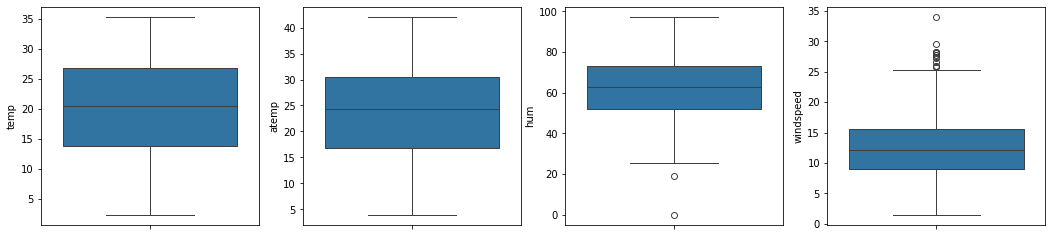

In [27]:
# Draw box plots for independent variables with continuous values
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bikeSharing_df)
    i+=1

#### From these plots, we can see there are no outliers to be handled. We are good with not having any outliers in the data set

# 4. EDA

#### 4.1 Draw pair Plots to check the linear relationship

<Figure size 1080x2160 with 0 Axes>

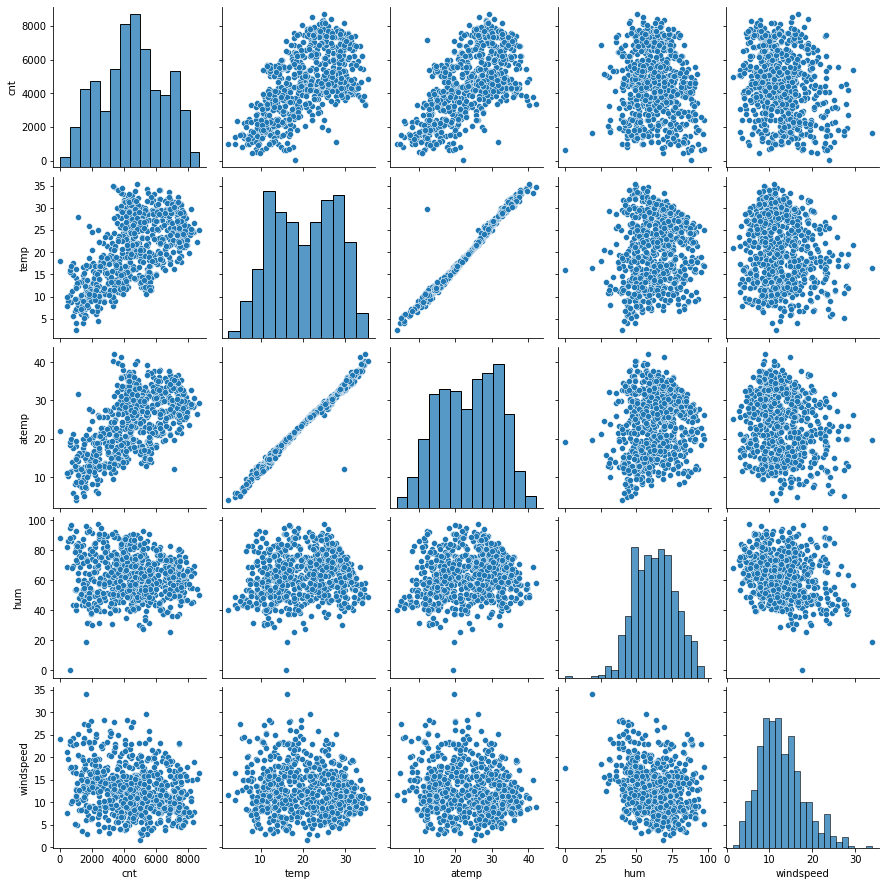

In [28]:
#Draw pairplots for continuous numeric variables using seaborn
plt.figure(figsize = (15,30))
sns.pairplot(data=bikeSharing_df,vars=['cnt', 'temp', 'atemp', 'hum','windspeed'])
# plt.show()
plt.savefig("Correlation")

#### _`Inference`_: 
- Looks like the temp and atemp has the highest corelation with the target variable cnt
- temp and atemp are highly co-related with each other
#### As seen from the correlation map, output variable has a linear relationship with variables like temp, atemp. 

#### 4.2 Visualising the Data to Find the Correlation between the Numerical Variable

<Figure size 1440x1080 with 0 Axes>

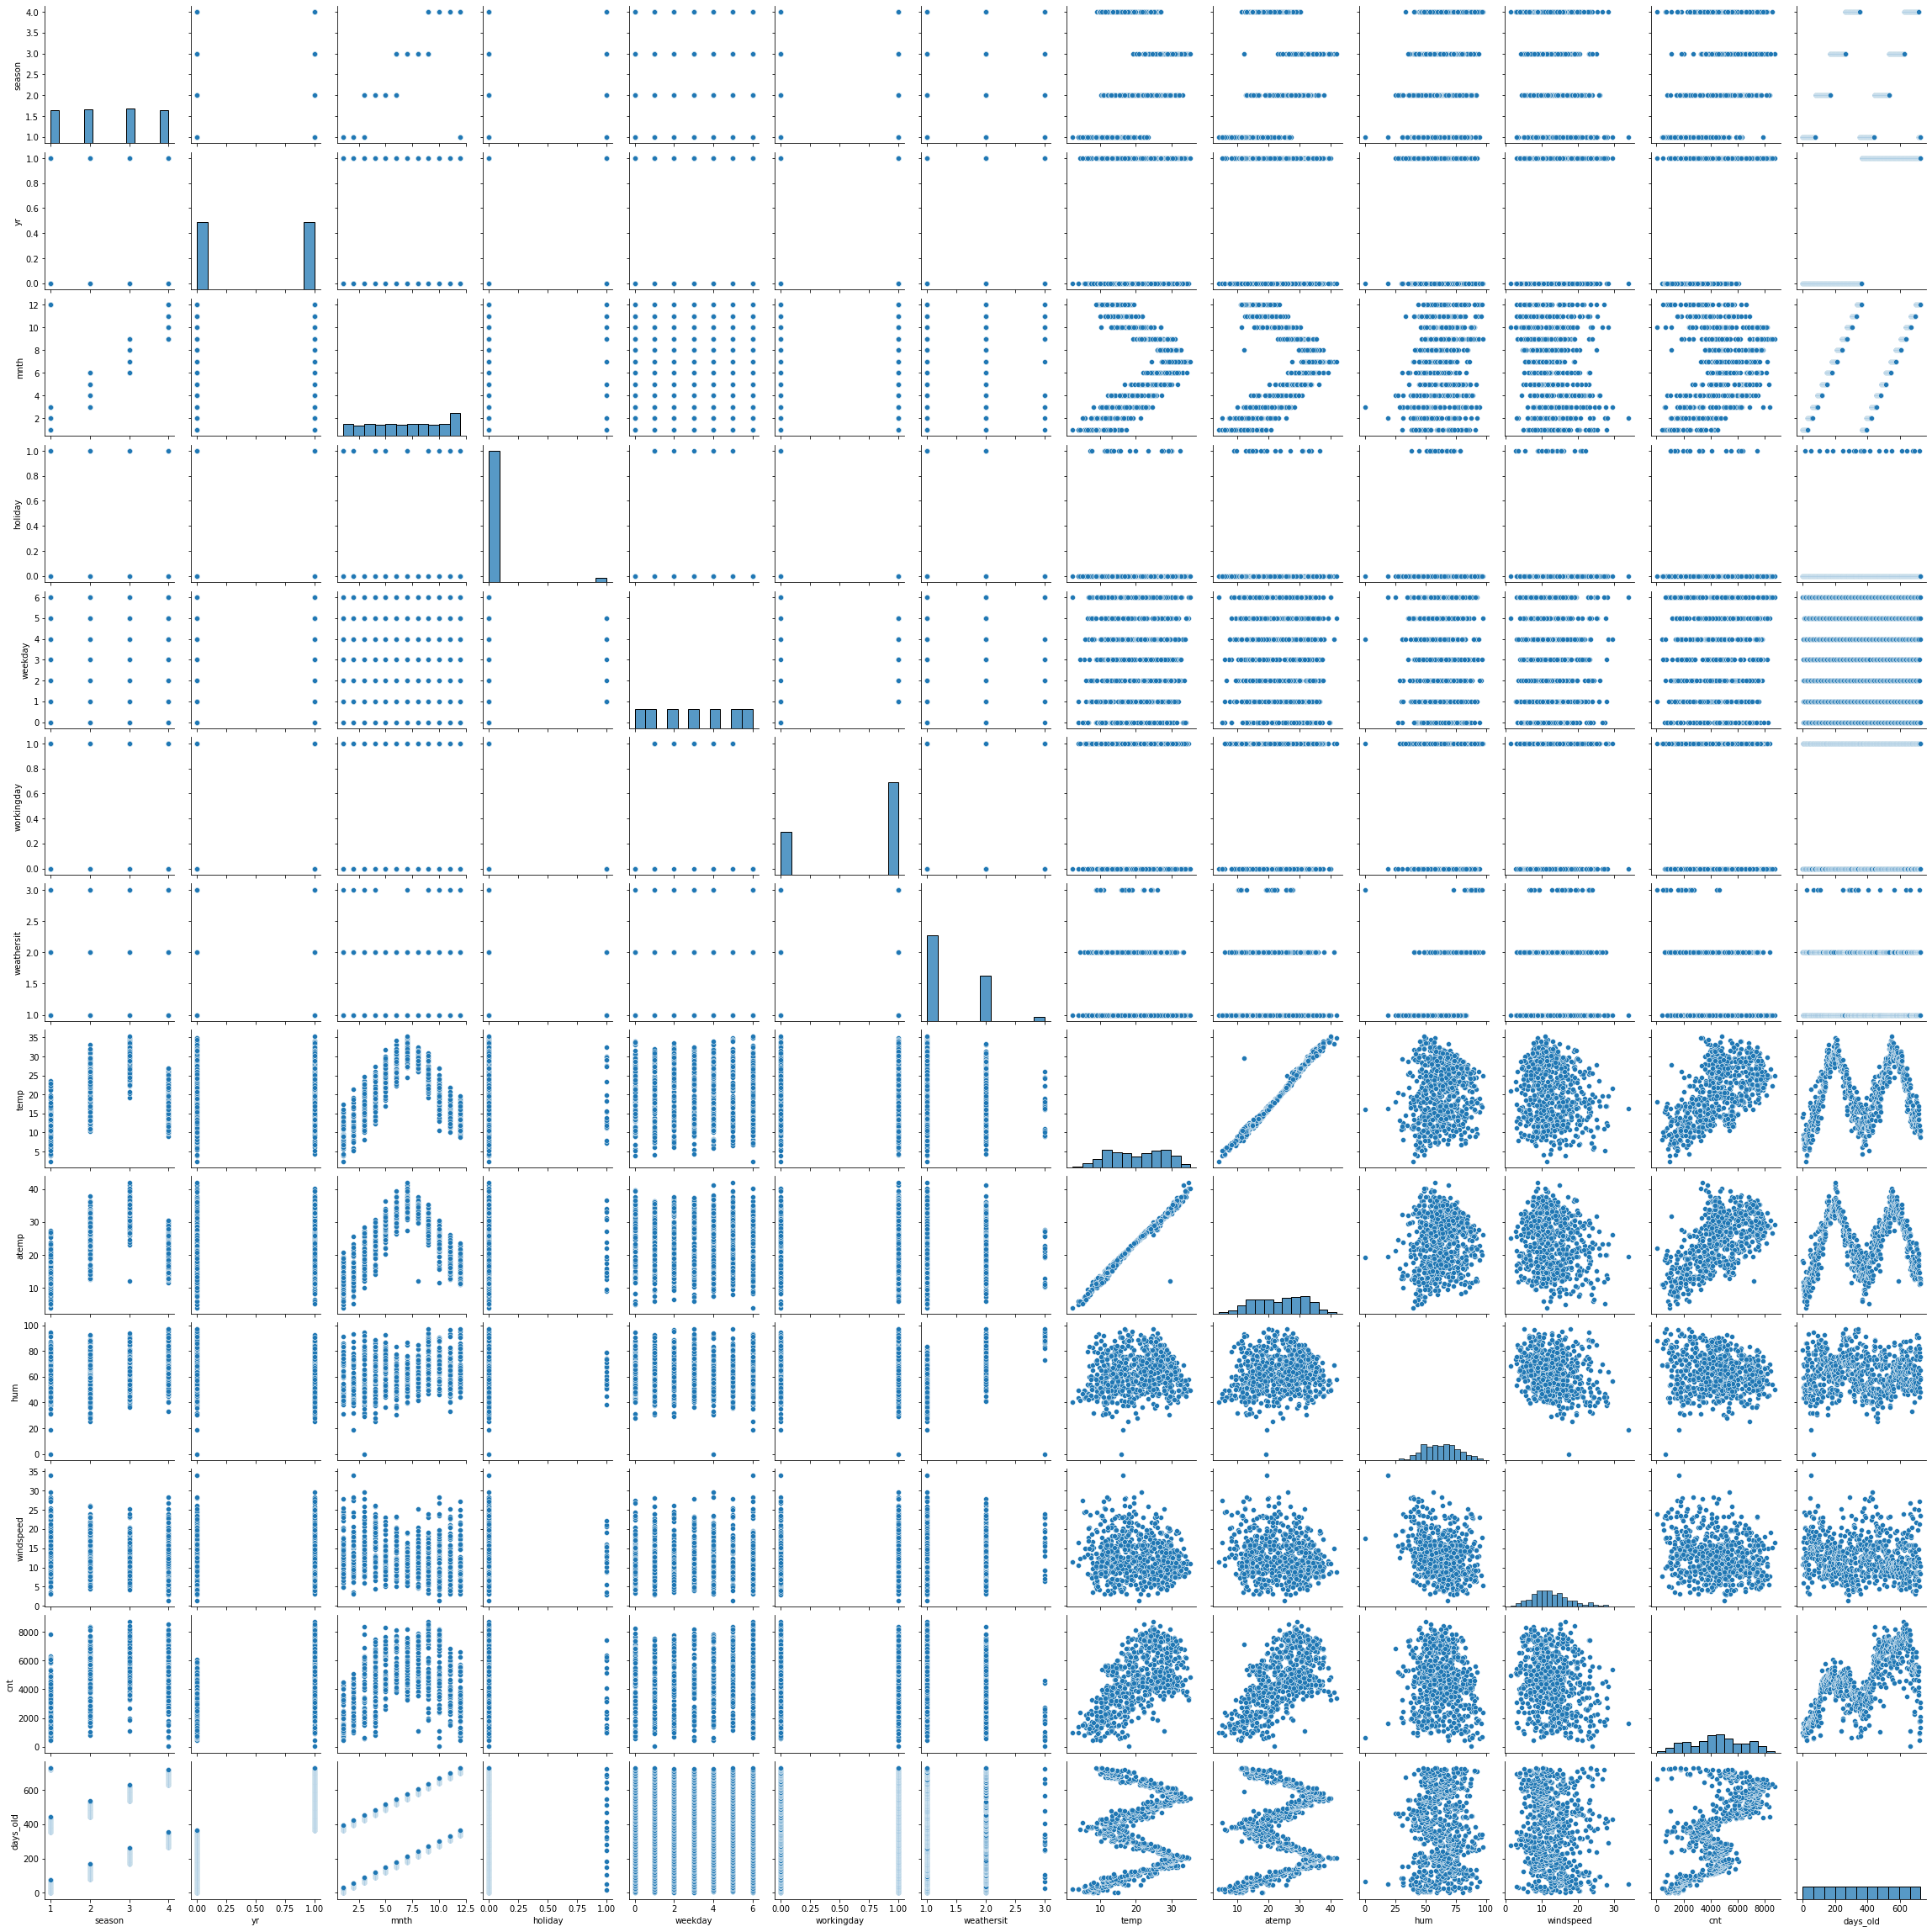

In [29]:
plt.figure(figsize=(20,15))
sns.pairplot(bikeSharing_df)
plt.show()

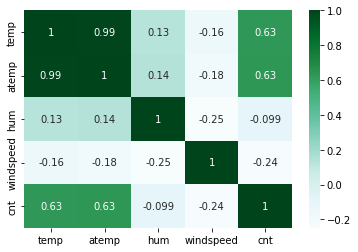

In [30]:
# Checking continuous variables relationship with each other
sns.heatmap(bikeSharing_df[['temp','atemp','hum','windspeed','cnt']].corr(), cmap='BuGn', annot = True)
plt.show()

#### Here we see that temp and atemp has correlation more than .99 means almost 1 (highly correlated) and atemp seems to be derived from temp so atemp field can be dropped here only

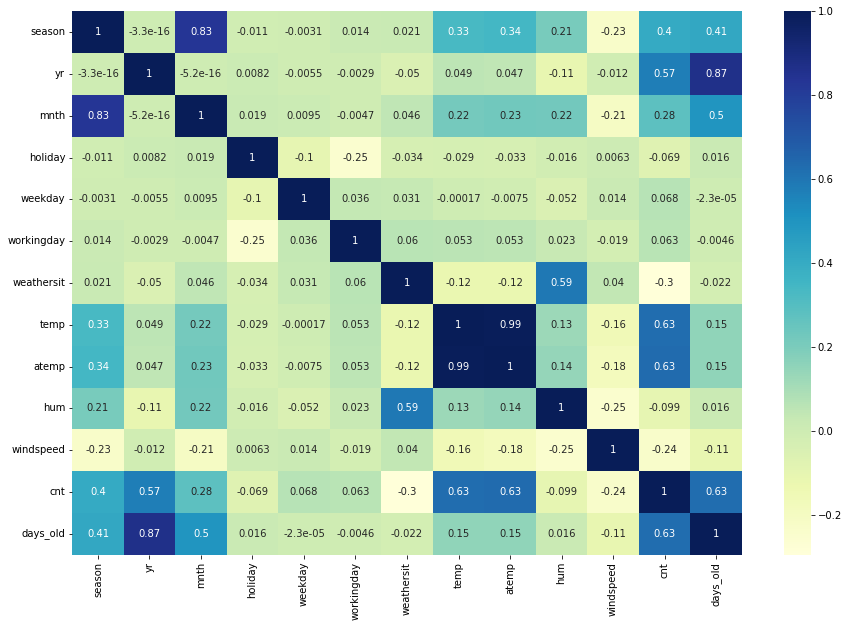

In [31]:
#Correlations for numeric variables
cor=bikeSharing_df.corr()
plt.figure(figsize=(15,10))
sns.heatmap(cor, cmap="YlGnBu", annot = True)
plt.show()

#### 4.3 Draw Heatmap of correlation between variables

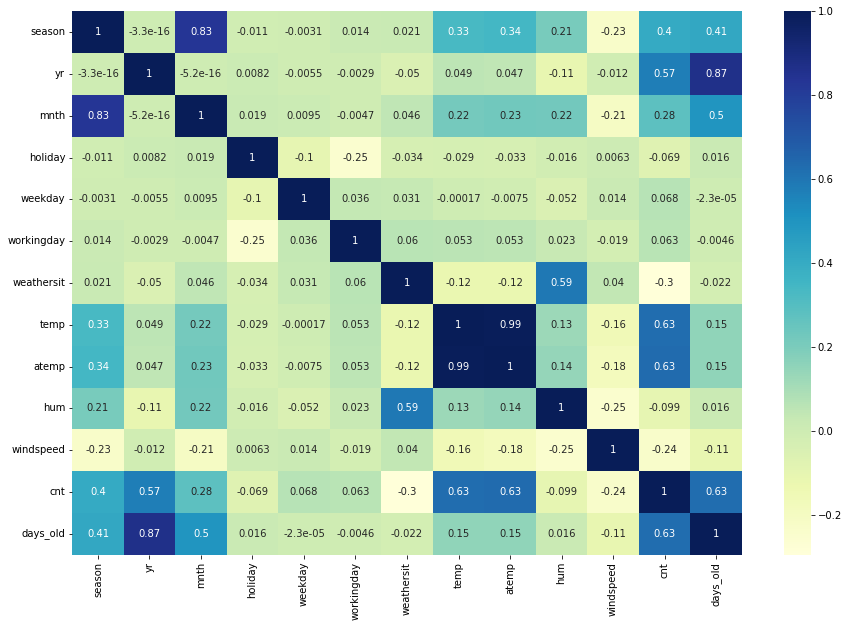

In [32]:
#Calculate Correlation
corr = bikeSharing_df.corr()
plt.figure(figsize=(15,10))

#Draw Heatmap of correlation
sns.heatmap(corr,annot=True, cmap='YlGnBu' )
plt.show()

#### From the correlation map, temp, atemp and days_old seems to be highly correlated and only should variable can be considered for the model. However let us elminate it based on the Variance Inflation Factor later during the model building.
#### We also see Target variable has a linear relationship with some of the  indeptendent variables. Good sign for building a linear regression Model.

#### 4.4 Convert season and  weathersit to categorical types
- instant: record index
- dteday : date
- season : season (1:spring, 2:summer, 3:fall, 4:winter)
- yr : year (0: 2018, 1:2019)
- mnth : month ( 1 to 12)
- holiday : weather day is a holiday or not
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit : 
	- 1: Clear, Few clouds, Partly cloudy, Partly cloudy **: good**
	- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist **: moderate**
	- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds **: bad**
	- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog **: severe**
- temp : temperature in Celsius
- atemp: feeling temperature in Celsius
- hum: humidity
- windspeed: wind speed
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered

In [33]:
bikeSharing_df.season = bikeSharing_df.season.map({1:"spring", 2:"summer", 3:"fall", 4:"winter"}).astype("category")
bikeSharing_df.weathersit = bikeSharing_df.weathersit.map({1:'good',2:'moderate',3:'bad',4:'severe'}).astype("category")

bikeSharing_df.mnth = bikeSharing_df.mnth.map({1: 'jan',2: 'feb',3: 'mar',4: 'apr',5: 'may',6: 'jun',
                  7: 'jul',8: 'aug',9: 'sept',10: 'oct',11: 'nov',12: 'dec'}).astype("category")

bikeSharing_df.weekday = bikeSharing_df.weekday.map({0: 'sun',1: 'mon',2: 'tue',3: 'wed',4: 'thu',5: 'fri',6: 'sat'}).astype("category")
bikeSharing_df.head()

season  yr mnth  holiday weekday  workingday weathersit       temp  \
0  spring   0  jan        0     sat           0   moderate  14.110847   
1  spring   0  jan        0     sun           0   moderate  14.902598   
2  spring   0  jan        0     mon           1       good   8.050924   
3  spring   0  jan        0     tue           1       good   8.200000   
4  spring   0  jan        0     wed           1       good   9.305237   

      atemp      hum  windspeed   cnt  days_old  
0  18.18125  80.5833  10.749882   985         0  
1  17.68695  69.6087  16.652113   801         1  
2   9.47025  43.7273  16.636703  1349         2  
3  10.60610  59.0435  10.739832  1562         3  
4  11.46350  43.6957  12.522300  1600         4

#### 4.5 Analysing Categorical Variabels with target variables 

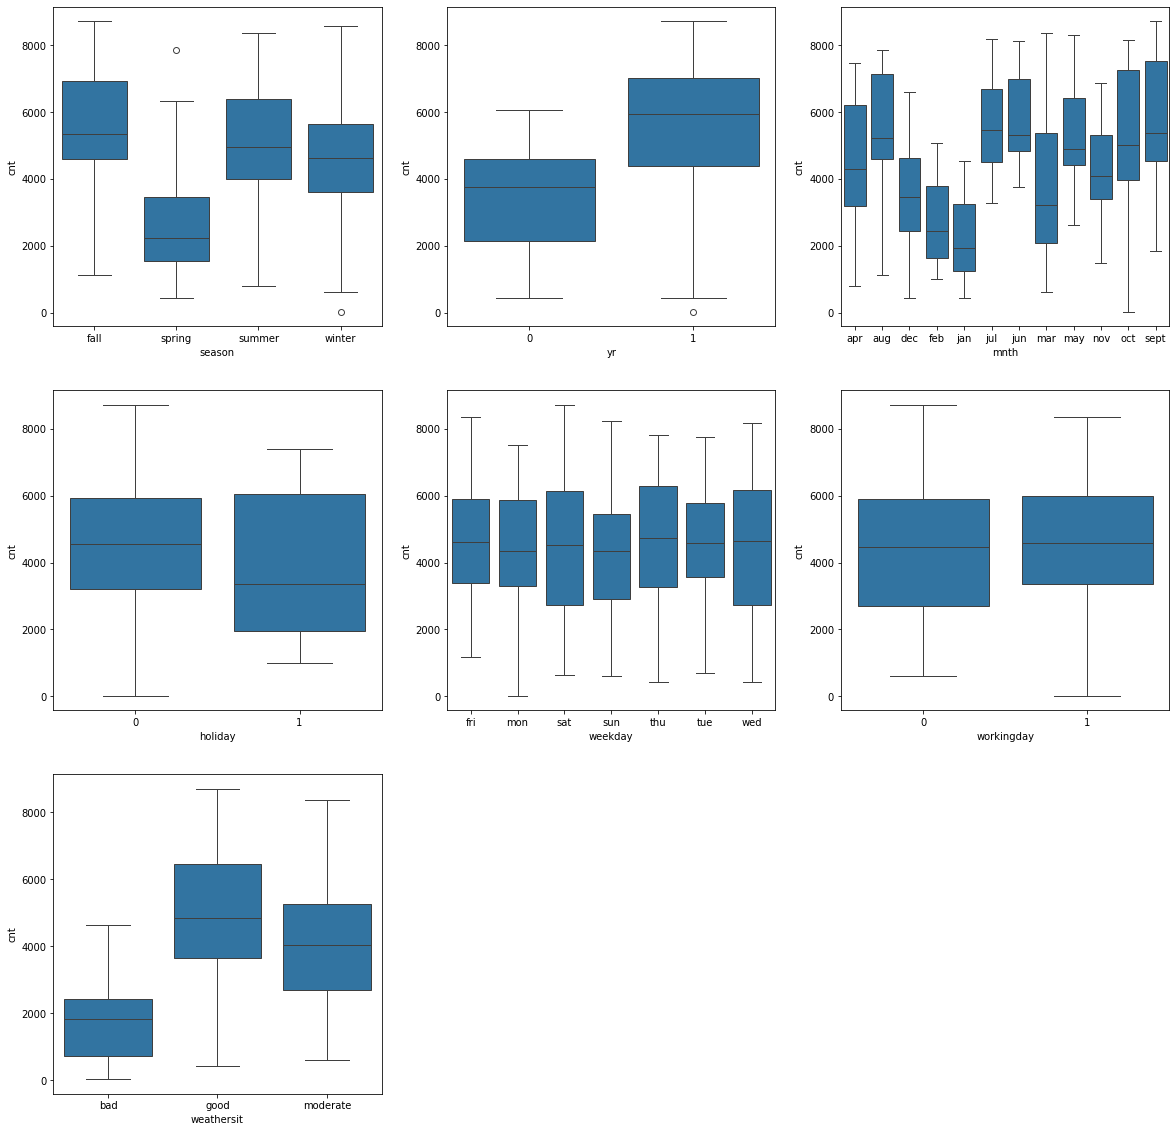

In [34]:
# Boxplot for categorical variables to see demands
vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize=(20, 20))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data=bikeSharing_df, x=i[1], y='cnt')
plt.savefig("Categorical")

#### _`Inference`_:
    Here many insights can be drawn from the plots

    1. Season: 3:fall has highest demand for rental bikes
    2. I see that demand for next year has grown
    3. Demand is continuously growing each month till June. September month has highest demand. After September, 
       demand is decreasing
    4. When there is a holiday, demand has decreased.
    5. Weekday is not giving clear picture abount demand.
    6. The good weathershit has highest demand
    7. During September, bike sharing is more. During the year end and beginning, it is less, could be due to 
       extreme weather conditions.

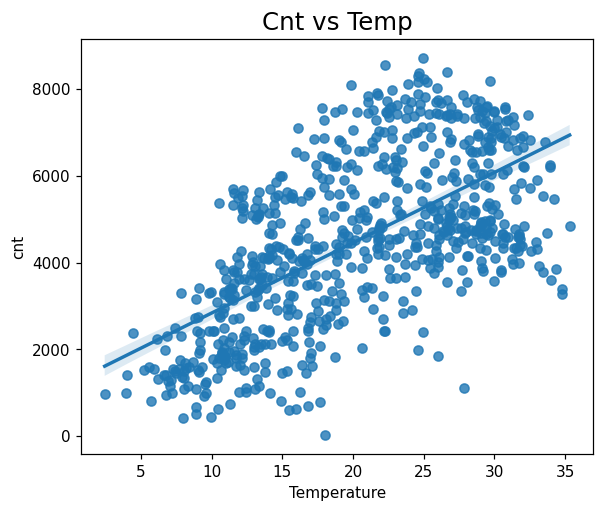

In [35]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Temp",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="temp")
plt.xlabel("Temperature")
plt.show()

#### _`Inference`_:
- Demand for bikes is positively correlated to temp.
- We can see that cnt is linearly increasing with temp indicating linear relation.

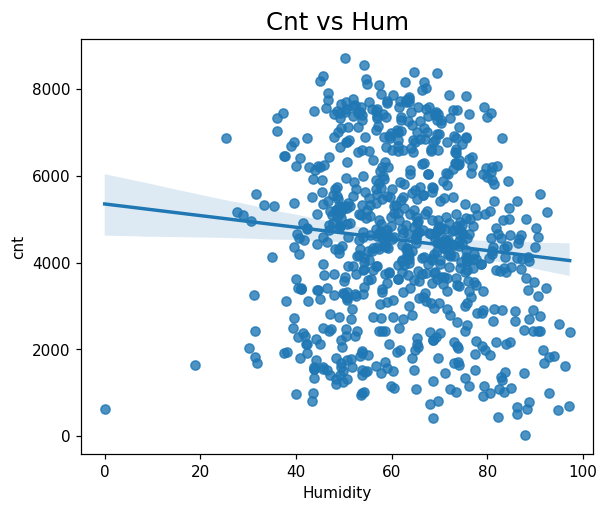

In [36]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Hum",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="hum")
plt.xlabel("Humidity")
plt.show()

#### _`Inference`_:
- Hum is values are more scattered around.
- Although we can see cnt decreasing with increase in humidity.

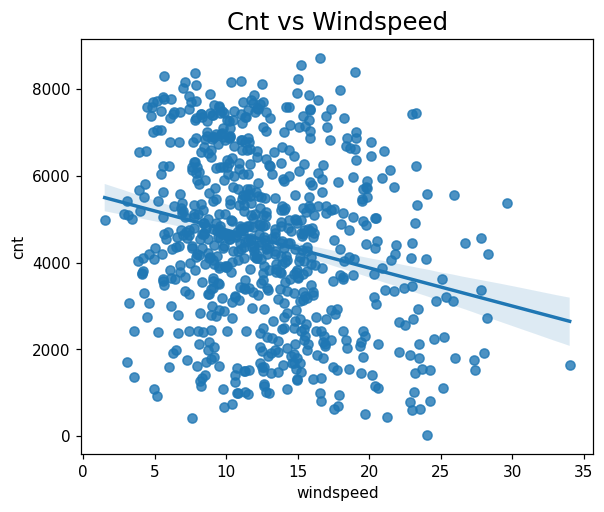

In [37]:
plt.figure(figsize=(6,5),dpi=110)
plt.title("Cnt vs Windspeed",fontsize=16)
sns.regplot(data=bikeSharing_df,y="cnt",x="windspeed")
plt.show()

#### _`Inference`_:
- Windspeed is values are more scattered around.
- Although we can see cnt decreasing with increase in windspeed.

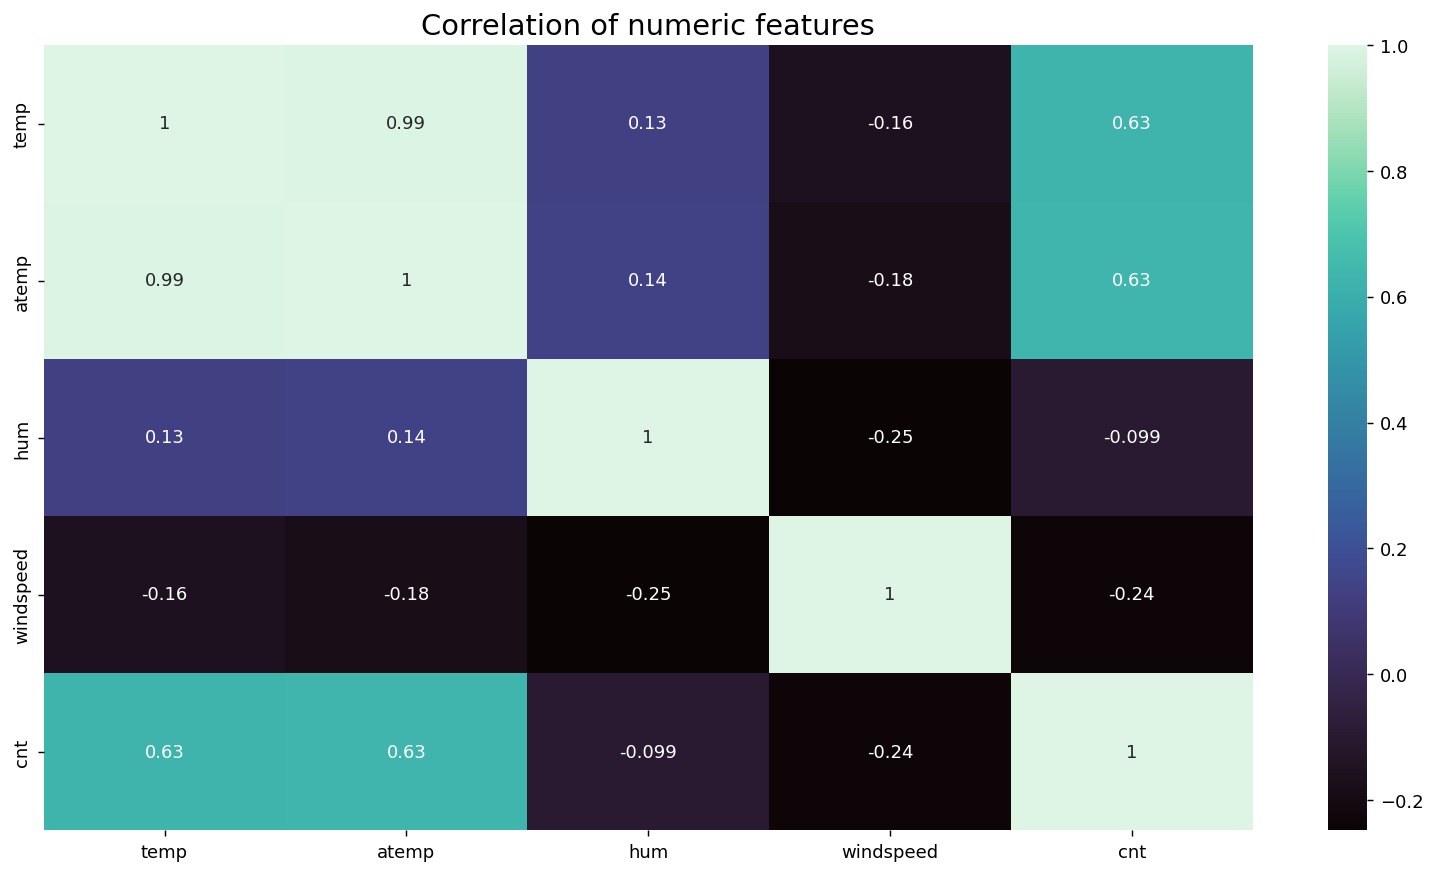

In [38]:
num_features = ["temp","atemp","hum","windspeed","cnt"]
plt.figure(figsize=(15,8),dpi=130)
plt.title("Correlation of numeric features",fontsize=16)
sns.heatmap(bikeSharing_df[num_features].corr(),annot= True,cmap="mako")
plt.show()

#### _`Inference`_:
- Temp and Atemp are highly correlated, we can take an action to remove one of them, but lets keep them for further analysis.
- Temp and Atemp also have high correlation with cnt variable.

In [39]:
bikeSharing_df.describe()

yr     holiday  workingday        temp       atemp         hum  \
count  730.000000  730.000000  730.000000  730.000000  730.000000  730.000000   
mean     0.500000    0.028767    0.683562   20.319259   23.726322   62.765175   
std      0.500343    0.167266    0.465405    7.506729    8.150308   14.237589   
min      0.000000    0.000000    0.000000    2.424346    3.953480    0.000000   
25%      0.000000    0.000000    0.000000   13.811885   16.889713   52.000000   
50%      0.500000    0.000000    1.000000   20.465826   24.368225   62.625000   
75%      1.000000    0.000000    1.000000   26.880615   30.445775   72.989575   
max      1.000000    1.000000    1.000000   35.328347   42.044800   97.250000   

        windspeed          cnt    days_old  
count  730.000000   730.000000  730.000000  
mean    12.763620  4508.006849  364.500000  
std      5.195841  1936.011647  210.877136  
min      1.500244    22.000000    0.000000  
25%      9.041650  3169.750000  182.250000  
50%     12.125325  4548.500000  364.500000  
75%     15.625589  5966.000000  546.750000  
max     34.000021  8714.000000  729.000000

# 5. Data Preparation for Linear Regression 

## 5.1 Create dummy variables for all categorical variables

In [40]:
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["season","mnth","weekday"],drop_first=True)
bikeSharing_df = pd.get_dummies(data=bikeSharing_df,columns=["weathersit"])

- Dropping the first columns as (p-1) dummies can explain p categories.
- In weathersit first column was not dropped so as to not lose the info about severe weather situation.

In [41]:
#Print columns after creating dummies
bikeSharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_old', 'season_spring', 'season_summer', 'season_winter',
       'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_jul', 'mnth_jun',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sept',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_bad', 'weathersit_good',
       'weathersit_moderate'],
      dtype='object')

In [42]:
#Print few rows to inspect
bikeSharing_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed   cnt  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882   985   
1   0        0           0  14.902598  17.68695  69.6087  16.652113   801   
2   0        0           1   8.050924   9.47025  43.7273  16.636703  1349   
3   0        0           1   8.200000  10.60610  59.0435  10.739832  1562   
4   0        0           1   9.305237  11.46350  43.6957  12.522300  1600   

   days_old  season_spring  ...  mnth_sept  weekday_mon  weekday_sat  \
0         0           True  ...      False        False         True   
1         1           True  ...      False        False        False   
2         2           True  ...      False         True        False   
3         3           True  ...      False        False        False   
4         4           True  ...      False        False        False   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0        False        False        False        False           False   
1         True        False        False        False           False   
2        False        False        False        False           False   
3        False        False         True        False           False   
4        False        False        False         True           False   

   weathersit_good  weathersit_moderate  
0            False                 True  
1            False                 True  
2             True                False  
3             True                False  
4             True                False  

[5 rows x 32 columns]

## 5.2 Split Data into training and test

In [43]:
# Checking shape before splitting
bikeSharing_df.shape

(730, 32)

In [44]:
#y to contain only target variable
y=bikeSharing_df.pop('cnt')

#X is all remainign variable also our independent variables
X=bikeSharing_df

#Train Test split with 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [45]:
#Inspect independent variables
X.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0           True          False  ...      False        False         True   
1           True          False  ...      False        False        False   
2           True          False  ...      False         True        False   
3           True          False  ...      False        False        False   
4           True          False  ...      False        False        False   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0        False        False        False        False           False   
1         True        False        False        False           False   
2        False        False        False        False           False   
3        False        False         True        False           False   
4        False        False        False         True           False   

   weathersit_good  weathersit_moderate  
0            False                 True  
1            False                 True  
2             True                False  
3             True                False  
4             True                False  

[5 rows x 31 columns]

In [46]:
# Checking shape and size for train and test
print(X_train.shape)
print(X_test.shape)

(511, 31)
(219, 31)


## 5.3 PCA based Top 5 Features that comtribute the most

In [47]:
# Standardize the numeric features
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(X_train)
print(numeric_scaled.shape)

# Apply PCA
pca = PCA()
numeric_pca_result = pca.fit_transform(numeric_scaled)

# Get the loadings for each principal component
loadings = pca.components_

# Create a DataFrame to display the loadings
loadings_df = pd.DataFrame(loadings, columns=X_train.columns)

# Get the explained variance ratios
explained_variance_ratios = pca.explained_variance_ratio_

# Create a DataFrame to store the information
pca_results = pd.DataFrame({
    'Principal Component': range(1, len(explained_variance_ratios) + 1),
    'Explained Variance Ratio': explained_variance_ratios
})

# Sort the DataFrame by the explained variance ratios in descending order
pca_results = pca_results.sort_values(by='Explained Variance Ratio', ascending=False)

# # Display the loadings DataFrame
# print("Loadings of each feature in principal components:")
# print(loadings_df)

# # Display the explained variance ratios
# print("\nExplained Variance Ratios:")
# print(pca_results)

# Identify the top features for the first few principal components (adjust as needed)
top_k_features = 6
for i in range(top_k_features):
    top_feature_indices = loadings_df.abs().idxmax(axis=1)
    top_feature_values = loadings_df.abs().max(axis=1)
    print(f"\nTop feature for Principal Component {i+1}: {top_feature_indices[i]} with loading value {top_feature_values[i]}")
    print(f"Explained Variance Ratio for Principal Component {i+1}: {explained_variance_ratios[i]}")

(511, 31)

Top feature for Principal Component 1: atemp with loading value 0.4838208300500143
Explained Variance Ratio for Principal Component 1: 0.12231008559158299

Top feature for Principal Component 2: season_winter with loading value 0.47408917553966895
Explained Variance Ratio for Principal Component 2: 0.08975738470175727

Top feature for Principal Component 3: weathersit_good with loading value 0.513816746965357
Explained Variance Ratio for Principal Component 3: 0.07878813761051898

Top feature for Principal Component 4: workingday with loading value 0.6389852251681175
Explained Variance Ratio for Principal Component 4: 0.06574190972006531

Top feature for Principal Component 5: season_summer with loading value 0.4093404648592921
Explained Variance Ratio for Principal Component 5: 0.0554001150695893

Top feature for Principal Component 6: yr with loading value 0.5630493374605525
Explained Variance Ratio for Principal Component 6: 0.05426494714665359


## 5.4 Feature Scaling continuous variables using Min-MAX

To make all features in same scale to interpret easily

Following columns are continous to be scaled
temp,hum,windspeed

In [48]:
# Let us scale continuous variables
num_vars = ['temp','atemp','hum','windspeed','days_old']

#Use Normalized scaler to scale
scaler = MinMaxScaler()

#Fit and transform training set only
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [49]:
#Inspect stats fro Training set after scaling
X_train

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   
..   ..      ...         ...       ...       ...       ...        ...   
71    0        0           0  0.405237  0.395131  0.543468   0.621696   
106   0        0           0  0.495350  0.481247  0.494203   0.704080   
270   0        0           1  0.717562  0.651183  0.874624   0.316186   
435   1        0           1  0.507811  0.499487  0.504079   0.464173   
102   0        0           1  0.440316  0.443951  0.844139   0.571635   

     days_old  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
683  0.936900          False          False  ...      False        False   
645  0.884774          False          False  ...      False         True   
163  0.223594          False           True  ...      False         True   
360  0.493827           True          False  ...      False        False   
640  0.877915          False          False  ...      False        False   
..        ...            ...            ...  ...        ...          ...   
71   0.097394           True          False  ...      False        False   
106  0.145405          False           True  ...      False        False   
270  0.370370          False          False  ...       True        False   
435  0.596708           True          False  ...      False         True   
102  0.139918          False           True  ...      False        False   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
683        False        False         True        False        False   
645        False        False        False        False        False   
163        False        False        False        False        False   
360        False        False        False         True        False   
640        False        False        False        False         True   
..           ...          ...          ...          ...          ...   
71         False         True        False        False        False   
106        False         True        False        False        False   
270        False        False        False        False         True   
435        False        False        False        False        False   
102        False        False        False        False         True   

     weathersit_bad  weathersit_good  weathersit_moderate  
683           False            False                 True  
645           False            False                 True  
163           False             True                False  
360           False            False                 True  
640           False            False                 True  
..              ...              ...                  ...  
71            False             True                False  
106           False             True                False  
270           False            False                 True  
435           False             True                False  
102           False            False                 True  

[511 rows x 31 columns]

In [50]:
X_train.head()

yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   

     days_old  season_spring  season_summer  ...  mnth_sept  weekday_mon  \
683  0.936900          False          False  ...      False        False   
645  0.884774          False          False  ...      False         True   
163  0.223594          False           True  ...      False         True   
360  0.493827           True          False  ...      False        False   
640  0.877915          False          False  ...      False        False   

     weekday_sat  weekday_sun  weekday_thu  weekday_tue  weekday_wed  \
683        False        False         True        False        False   
645        False        False        False        False        False   
163        False        False        False        False        False   
360        False        False        False         True        False   
640        False        False        False        False         True   

     weathersit_bad  weathersit_good  weathersit_moderate  
683           False            False                 True  
645           False            False                 True  
163           False             True                False  
360           False            False                 True  
640           False            False                 True  

[5 rows x 31 columns]

## 5.5 Feature Analysis using RFE and Automated approach

### Use RFE to eliminate some columns

In [51]:
# Build a Lienar Regression model using SKLearn for RFE
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [52]:
#Cut down number of features to 15 using automated approach
rfe = RFE(lr,n_features_to_select=15)
rfe.fit(X_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [53]:
#Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_old', True, 1),
 ('season_spring', True, 1),
 ('season_summer', False, 14),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 6),
 ('mnth_feb', False, 12),
 ('mnth_jan', False, 10),
 ('mnth_jul', False, 13),
 ('mnth_jun', False, 9),
 ('mnth_mar', True, 1),
 ('mnth_may', False, 5),
 ('mnth_nov', False, 7),
 ('mnth_oct', True, 1),
 ('mnth_sept', True, 1),
 ('weekday_mon', False, 15),
 ('weekday_sat', False, 2),
 ('weekday_sun', False, 4),
 ('weekday_thu', False, 17),
 ('weekday_tue', False, 11),
 ('weekday_wed', False, 16),
 ('weathersit_bad', True, 1),
 ('weathersit_good', True, 1),
 ('weathersit_moderate', True, 1)]

# 6. Build Model 

### 6.1 Function to build a model using statsmodel api

In [54]:
#Function to build a model using statsmodel api - Takes the columns to be selected for model as a parameter
def build_model(cols):
    X_train_sm = sm.add_constant(X_train[cols])
    lm = sm.OLS(y_train, X_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

### 6.2 Function to calculate VIFs and print them

In [55]:
#Function to calculate VIFs and print them -Takes the columns for which VIF to be calcualted as a parameter
def get_vif(cols):
    df1 = X_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by='VIF',ascending=False))

###  Model 1 - Start with all variables selected by RFE

In [56]:
#Selected columns for Model 1 - all columns selected by RFE
cols = X_train.columns[rfe.support_].values
print(cols)
build_model(cols)
get_vif(cols)

['yr' 'holiday' 'temp' 'atemp' 'hum' 'windspeed' 'days_old'
 'season_spring' 'season_winter' 'mnth_mar' 'mnth_oct' 'mnth_sept'
 'weathersit_bad' 'weathersit_good' 'weathersit_moderate']
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     183.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.58e-185
Time:                        08:27:10   Log-Likelihood:                -4128.0
No. Observations:                 511   AIC:                             8286.
Df Residuals:                     496   BIC:                             8349.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        

### Model 2

In [57]:
# Dropping the variable with negative coefficient and highly correrlated feature
to_remove = ['holiday','hum','windspeed', 'days_old', 'season_spring', 'weathersit_bad', 'temp', 'weathersit_moderate']
cols = list(set(cols)-set(to_remove))
build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     246.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.05e-158
Time:                        08:27:10   Log-Likelihood:                -4212.3
No. Observations:                 511   AIC:                             8441.
Df Residuals:                     503   BIC:                             8474.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            -322.5975    138.777     

### Model 3

In [58]:
# Further dropping the variable with higher p values
cols = ['yr', 'season_spring', 'mnth_mar',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_bad', 'atemp']

#['yr', 'holiday','temp', 'spring','winter', 'July','September','Sunday','Light_Snow_Rain','Mist_Clody']
lr_sm = build_model(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.65e-181
Time:                        08:27:10   Log-Likelihood:                -4153.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     501   BIC:                             8369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1243.9282    199.944     

#### _`Inference`_
Here VIF seems to be almost accepted. p-value for all the features is  almost 0.0 and R2 is 0.821
Let us select Model 3 as our final as it has all important statistics high (R-square, Adjusted R-squared and F-statistic), along with no insignificant variables and no multi coliinear (high VIF) variables. 
Difference between R-squared and Adjusted R-squared values for this model is veryless, which also means that there are no additional parameters that can be removed from this model.

### LR

In [59]:
#Build a model with all columns to select features automatically
def build_model_sk(X,y):
    lr1 = LinearRegression()
    lr1.fit(X,y)
    return lr1


In [60]:
#Let us build the finalmodel using sklearn
cols = ['yr', 'season_spring', 'mnth_mar',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_bad', 'atemp']

#Build a model with above columns
lr = build_model_sk(X_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1243.9282365331678 [ 1992.80413999 -1257.32047158   549.86280078   506.59817653
   611.93382401  -347.94701374   665.7955312  -1656.16739683
  3858.72718399]


## Step 7. Model Evaluation 
### 7.1 Residucal Analysis

In [61]:
y_train_pred = lr.predict(X_train[cols])
X_train_sm = sm.add_constant(X_train[cols])
y_train_pred_sm = lr_sm.predict(X_train_sm)

In [62]:
print(y_train_pred.shape)
print(y_train_pred_sm.shape)

(511,)
(511,)


In [63]:
#Plot a histogram of the error terms
def plot_res_dist(act, pred):
    sns.histplot(act-pred)
    plt.title('Error Terms')
    plt.xlabel('Errors')

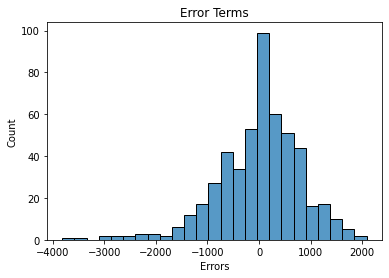

In [64]:
plot_res_dist(y_train.to_numpy() , y_train_pred)

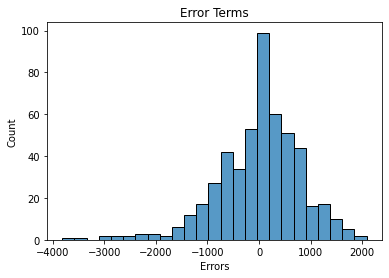

In [65]:
plot_res_dist(y_train.to_numpy() , y_train_pred_sm)

#### Errors are normally distribured here with mean 0. So everything seems to be fine

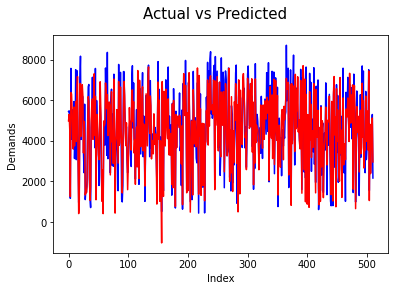

In [66]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train.values, color="blue")
plt.plot(c,y_train_pred, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

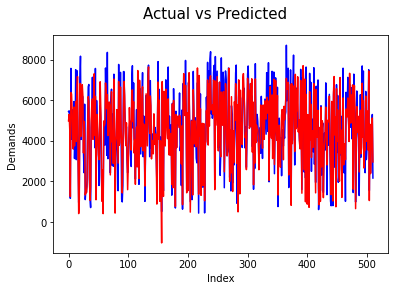

In [67]:
# Actual vs Predicted
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train.values, color="blue")
plt.plot(c,y_train_pred_sm, color="red")
plt.suptitle('Actual vs Predicted', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

#### Actual and Predicted result following almost the same pattern so this model seems ok

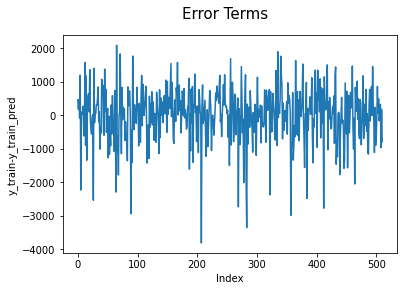

In [68]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train.values-y_train_pred)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

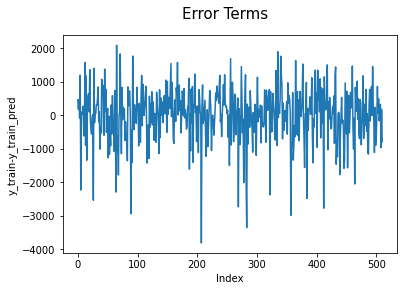

In [69]:
# Error Terms
c = [i for i in range(0,len(X_train),1)]
plt.plot(c,y_train.values-y_train_pred_sm)
plt.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

#### Here,If we see the error terms are independent of each other.

In [70]:
#Print R-squared Value
r2_score(y_train,y_train_pred)

0.8210024296682309

In [71]:
#Print R-squared Value
r2_score(y_train,y_train_pred_sm)

0.8210024296682308

### _`Inference`_
R2 Same as we obtained for our final model

### 7.2 Linearity Check

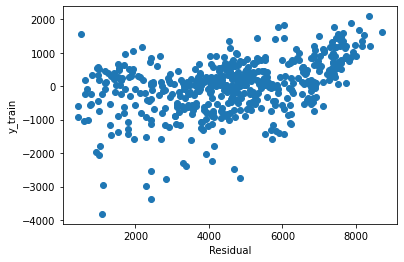

In [72]:
# scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

### 7.3 Predict values for test data set

In [73]:
#Columns from our final model
cols =['yr', 'season_spring', 'mnth_mar',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_bad', 'atemp']

#Predict the values for test data
y_test_pred = lr.predict(X_test[cols])

### 7.4 R-Squared value for test predictions

In [74]:
# Find out the R squared value between test and predicted test data sets.  
r2_score(y_test,y_test_pred)

0.8041226275327966

### 7.5 Homoscedacity

##### _`Inference`_ 
R2 value for predictions on test data (0.815) is almost same as R2 value of train data(0.818). This is a good R-squared value, hence we can see our model is performing good even on unseen data (test data)

Text(0, 0.5, 'y_test_pred')

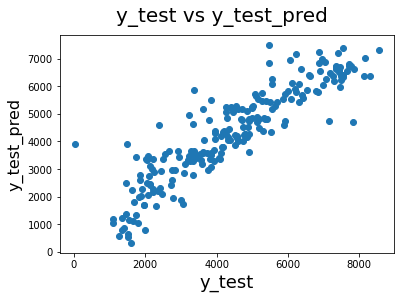

In [75]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

####  _`Inference`_
We can observe that variance of the residuals (error terms) is constant across predictions.  i.e error term does not vary much as the value of the predictor variable changes.

### 7.8 Plot Test vs Predicted test values

In [76]:
#Function to plot Actual vs Predicted
#Takes Actual and PRedicted values as input along with the scale and Title to indicate which data
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,pred, color="red",  linewidth=2.5, linestyle="-")
    fig.suptitle('Actual and Predicted - '+dataname, fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                               # X-label
    plt.ylabel('Counts', fontsize=16)                               # Y-label

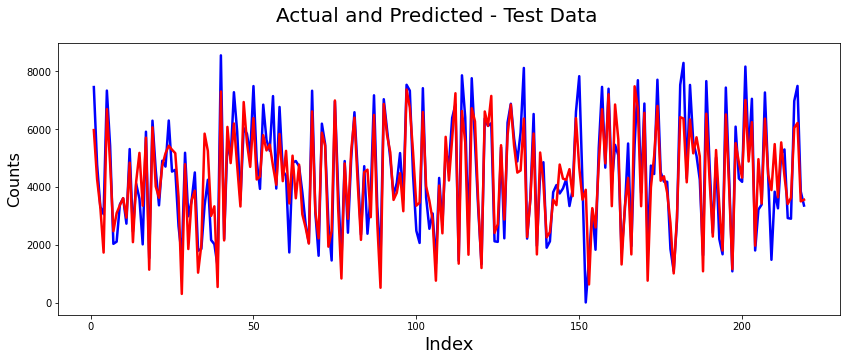

In [77]:
#Plot Actual vs Predicted for Test Data
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

#### _`Inference`_
As we can see predictions for test data is very close to actuals

### 7.9 Plot Error Terms for test data

In [78]:
# Error terms
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize=(14,5))
    plt.plot(c,act-pred, color="blue", marker='o', linewidth=2.5, linestyle="")
    fig.suptitle('Error Terms', fontsize=20)              # Plot heading 
    plt.xlabel('Index', fontsize=18)                      # X-label
    plt.ylabel('Counts - Predicted Counts', fontsize=16)                # Y-label

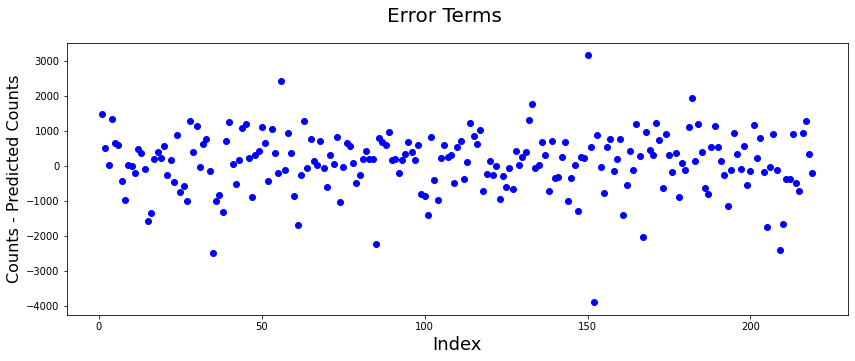

In [79]:
#Plot error terms for test data
plot_err_terms(y_test,y_test_pred)

#### _`Inference`_
As we can see the error terms are randomly distributed and there is no pattern which means the output is explained well by the model and there are no other parameters that can explain the model better.

### 8. Making Predictions

In [80]:
# Checking data before scaling
bikeSharing_df.head()

yr  holiday  workingday       temp     atemp      hum  windspeed  days_old  \
0   0        0           0  14.110847  18.18125  80.5833  10.749882         0   
1   0        0           0  14.902598  17.68695  69.6087  16.652113         1   
2   0        0           1   8.050924   9.47025  43.7273  16.636703         2   
3   0        0           1   8.200000  10.60610  59.0435  10.739832         3   
4   0        0           1   9.305237  11.46350  43.6957  12.522300         4   

   season_spring  season_summer  ...  mnth_sept  weekday_mon  weekday_sat  \
0           True          False  ...      False        False         True   
1           True          False  ...      False        False        False   
2           True          False  ...      False         True        False   
3           True          False  ...      False        False        False   
4           True          False  ...      False        False        False   

   weekday_sun  weekday_thu  weekday_tue  weekday_wed  weathersit_bad  \
0        False        False        False        False           False   
1         True        False        False        False           False   
2        False        False        False        False           False   
3        False        False         True        False           False   
4        False        False        False         True           False   

   weathersit_good  weathersit_moderate  
0            False                 True  
1            False                 True  
2             True                False  
3             True                False  
4             True                False  

[5 rows x 31 columns]

### 8.1 Intrepretting the Model

#### Let us go with interpretting the RFE with Manual model results as we give more importance to imputation

In [81]:
#Let us rebuild the final model of manual + rfe approach using statsmodel to interpret it
cols = ['yr', 'season_spring', 'mnth_mar',
        'season_winter', 'mnth_sept', 'weekday_sun',
       'weathersit_good', 'weathersit_bad', 'atemp']

lm = build_model(cols)


                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     255.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          7.65e-181
Time:                        08:27:12   Log-Likelihood:                -4153.1
No. Observations:                 511   AIC:                             8326.
Df Residuals:                     501   BIC:                             8369.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            1243.9282    199.944     

# _`Conclusion`_
Significant variables to predict the demand for shared bikes
- Feeling temperature in Celsius
- Season
- Months(March, September)
- Year (2019)
- Sunday
- weathersit( Clear, Few clouds, Partly cloudy, Partly cloudy, Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)

### Analysing the above model, the comapany should focus on the following features:
Here's our interpretation:

1. **Seasonal Impact:**
   - The company should focus on expanding business during Spring, as indicated by the negative coefficient for the "season_spring" variable.

2. **Month of March to September:**
   - There is a positive impact on the number of users during the months of March to September. The company should pay attention to these periods for potential business expansion.

3. **Yearly Trend:**
   - The "yr" variable has a positive coefficient, suggesting a yearly increase in the number of users. This could be due to general growth or other external factors.

4. **Weather Conditions:**
   - The weather conditions also play a significant role. Good weather ("weathersit_good") has a positive impact, while bad weather ("weathersit_bad") has a negative impact.

5. **Temperature ("atemp"):**
   - A significant positive impact on the number of users is observed with an increase in temperature ("atemp"). This suggests that the company may experience increased demand during warmer periods.
